In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [26]:
from modules.load_data import load_df
from modules.randForest import profile_correlation as rfpc
from modules.randForest import CustomRandomForestRegressor as CRF
from modules.nn import profile_correlation as nnpc

In [27]:
from modules.utils import _cnorm

In [28]:
from modules.anomaly_detection import AD

In [29]:
df = load_df()
df_n = df.apply(_cnorm)
df.head()

,Temperature (C),pH,Turbidity (NTU),BOD (mg/l),Fecal Coliform (MPN/100ml),Disolved Oxygen (mg/l),NITRATENAN N+ NITRITENANN (mg/l),Conductivity (micro_mhos/cm)
0,30.6,7.5,47.0,48.9,5421,4.0,0.13,208
1,30.6,7.2,45.8,47.0,5632,4.0,0.12,210
2,30.6,7.1,45.4,48.1,5550,4.0,0.10,219
3,30.6,7.1,45.6,48.9,5444,4.0,0.12,220
4,30.6,7.2,46.0,47.0,5218,3.9,0.13,215


In [31]:
df_a = AD(df)

In [57]:
# Try a PCA
pca_data, pca_df = df_a.pca("method", "z")

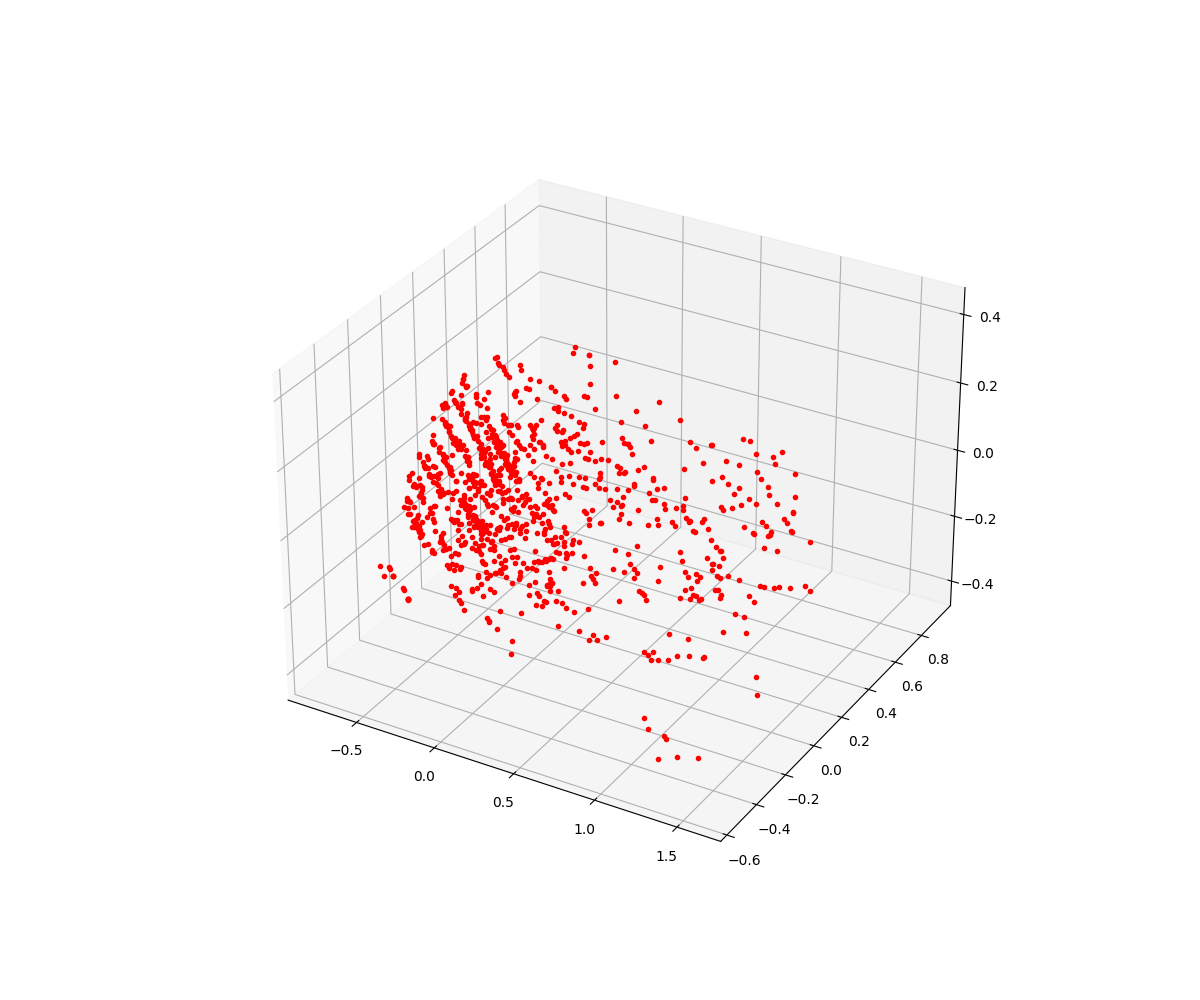

In [64]:
%matplotlib widget
fig = plt.figure(figsize=(12,10))
ax =  plt.axes(projection="3d")
ax.plot3D(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], "r.")

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
dnorm.corr("method", "ktay")

In [ ]:
%matplotlib inline
ax, df_r = rfpc(df)

### Issues with NN
- The nn has more hyper parameters to tune (the random forest does not)
- The nn is more compute intense on training
- The nn has issues with convergence during training


NN training is done differently t

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
ax, fig = nnpc(df, no_iters=15)
ax.set_ylim([-2, 2])

In [ ]:
df.shape

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
df.boxplot(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

In [ ]:
import seaborn as sns
sns.displot(df)

In [ ]:
norm_df = (df - df.min())/(df.max() - df.min())
df_gauss_norm = (df - df.mean())/df.std()

In [ ]:
sns.displot(df_gauss_norm)

# Objective:
Look at correlation

In [ ]:
df_gauss_norm.corr()

In [ ]:
df_ = df
cols = list(df_.columns)
# Dissolved Oxygen is a enumerated variable
df_.plot.scatter(x=cols[0], y=cols[6])

In [ ]:

x_names = list(df_.columns)
y = 5
y_name = x_names.pop(5)
print(x_names, y_name)
X = df_[x_names]
Y = df_[y_name]
print(len(x_names))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

In [ ]:
reg = RandomForestRegressor(n_estimators=7, random_state=191)
reg.fit(x_train, y_train)

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

In [ ]:
from modules.randForest import CustomRandomForestRegressor as CRF

In [ ]:
n = 200
r2s = np.zeros((n, ))
for i in range(n):
    obj = CRF(df_, y_name, random_state=True)
    r2s[i] = obj.r2()

In [ ]:
fig, ax = plt.subplots(1,1)
ax.scatter(np.arange(n)/n, sorted(r2s))

In [ ]:
from modules.nn import NN

In [ ]:
df.shape

In [ ]:
y_name = list(df.columns)[0]
obj = NN(df, y_name, hidden_layer_sizes=100)

# PCA
Eporing the PCA analysis
PCA : Princapal component analysis : 

In [ ]:
from sklearn.decomposition import PCA

In [11]:
n, m = df.shape
P = PCA(n_components=m)
P.fit(df_n)

PCA(n_components=8)

In [12]:
print(P.singular_values_)

[17.63298285  6.29423287  4.98743273  3.93146583  3.06610745  2.91503774
  1.94525204  1.26851318]


In [ ]:
print(P.explained_variance_ratio_)

In [ ]:
df_norm = (df - df.min())/(df.max() - df.min())

In [ ]:
import seaborn as sns
sns.heatmap(df_norm)

In [ ]:
sns.displot(df_norm)

In [ ]:
from scipy import stats
df_norm_eps = df_norm + 0.01

In [ ]:
def box_wrap(series):
    fitted_data, fitted_lambda = stats.boxcox(series)
    return fitted_data

In [ ]:
df_box_plot = df_norm_eps.apply(box_wrap)

In [ ]:
sns.displot(df_box_plot) 

In [ ]:
sns.displot(df_box_plot, x=df_box_plot.columns[6])